<a href="https://colab.research.google.com/github/joelleyarro03/nasa-ai-conceptual-willianeyarro/blob/main/deepspace_group1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Deep Space Probe Data Simulation

# 1. Import necessary libraries
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import random

# 2. Define Data Packet Types and Priorities
#    We'll assign numerical priorities where lower numbers indicate higher priority.
#    Example: Emergency = 1, Science = 2, Log = 3

data_types = {
    "Emergency Alert": {"priority": 1, "description": "Critical, immediate action required."},
    "Science Data (Image)": {"priority": 2, "description": "High-value scientific observations."},
    "Science Data (Telemetry)": {"priority": 2, "description": "Continuous sensor readings."},
    "System Log": {"priority": 3, "description": "Routine operational logs."},
    "Diagnostic Report": {"priority": 3, "description": "Detailed system health information."},
    "Housekeeping Data": {"priority": 4, "description": "Low-priority, routine probe status."}
}

# 3. Function to Generate a Single Data Packet
def generate_data_packet(start_time):
    """Generates a single simulated data packet."""
    packet_type_name, details = random.choice(list(data_types.items()))
    priority = details["priority"]
    description = details["description"]

    # Simulate data size (in KB)
    if "Emergency" in packet_type_name:
        data_size_kb = random.randint(10, 100)  # Emergency alerts are typically small
    elif "Science Data (Image)" in packet_type_name:
        data_size_kb = random.randint(500, 5000) # Images can be large
    elif "Science Data (Telemetry)" in packet_type_name:
        data_size_kb = random.randint(50, 500)
    else:
        data_size_kb = random.randint(1, 200)

    # Simulate a timestamp
    timestamp = start_time + timedelta(seconds=random.randint(0, 3600*24*7)) # Over a week for simulation

    # Simulate content (simplified)
    content = f"Simulated {packet_type_name} data."
    if "Emergency" in packet_type_name:
        content += f" Critical system failure detected at {timestamp}."
    elif "Science Data (Image)" in packet_type_name:
        # Simulate a small array for an image
        image_data = np.random.randint(0, 256, size=(random.randint(10, 50), random.randint(10, 50))).tolist()
        content = f"Simulated Image Data: {image_data[:5]}..." # Show a small part
    elif "System Log" in packet_type_name:
        log_entries = [f"Log entry {i}: System status normal." for i in range(random.randint(5,20))]
        content = "\n".join(log_entries)


    packet = {
        "timestamp": timestamp,
        "type": packet_type_name,
        "priority": priority,
        "size_kb": data_size_kb,
        "content_summary": content[:100] + "..." if len(content) > 100 else content # Truncate for display
    }
    return packet

# 4. Generate Multiple Data Packets
def simulate_probe_data(num_packets=100, start_date_str="2025-07-01 00:00:00"):
    """Simulates a series of data packets from a deep space probe."""
    simulated_data = []
    start_time = datetime.strptime(start_date_str, "%Y-%m-%d %H:%M:%S")

    print(f"Generating {num_packets} data packets starting from {start_time}...\n")
    for _ in range(num_packets):
        packet = generate_data_packet(start_time)
        simulated_data.append(packet)

    # Sort packets by timestamp for a realistic flow
    simulated_data.sort(key=lambda x: x["timestamp"])

    return pd.DataFrame(simulated_data)

# 5. Run the Simulation
if __name__ == "__main__":
    # Simulate 50 data packets
    probe_data_df = simulate_probe_data(num_packets=50)

    print("--- Simulated Probe Data ---")
    print(probe_data_df.head(10)) # Display the first 10 packets

    print("\n--- Data Packet Type Distribution ---")
    print(probe_data_df['type'].value_counts())

    print("\n--- Priority Distribution ---")
    print(probe_data_df['priority'].value_counts().sort_index())

    print("\n--- Average Data Size by Type (KB) ---")
    print(probe_data_df.groupby('type')['size_kb'].mean().round(2))

    print("\n--- Example of a high-priority packet ---")
    high_priority_packets = probe_data_df[probe_data_df['priority'] == 1]
    if not high_priority_packets.empty:
        print(high_priority_packets.iloc[0])
    else:
        print("No high-priority packets generated in this simulation.")

Generating 50 data packets starting from 2025-07-01 00:00:00...

--- Simulated Probe Data ---
            timestamp                      type  priority  size_kb  \
0 2025-07-01 02:29:02         Housekeeping Data         4      111   
1 2025-07-01 03:44:20         Housekeeping Data         4       70   
2 2025-07-01 05:28:16  Science Data (Telemetry)         2      443   
3 2025-07-01 07:12:04      Science Data (Image)         2     4630   
4 2025-07-01 10:00:06         Housekeeping Data         4       91   
5 2025-07-01 12:37:26           Emergency Alert         1       96   
6 2025-07-01 13:09:42           Emergency Alert         1       41   
7 2025-07-01 15:17:23  Science Data (Telemetry)         2      369   
8 2025-07-02 03:55:23         Diagnostic Report         3       52   
9 2025-07-02 04:59:16         Housekeeping Data         4      141   

                                     content_summary  
0                  Simulated Housekeeping Data data.  
1                  Simula

## Visualize the data

### Subtask:
Plot a time series graph showing the number of packets of each type over time.


**Reasoning**:
Plot a time series graph showing the number of packets of each type over time using the grouped data.



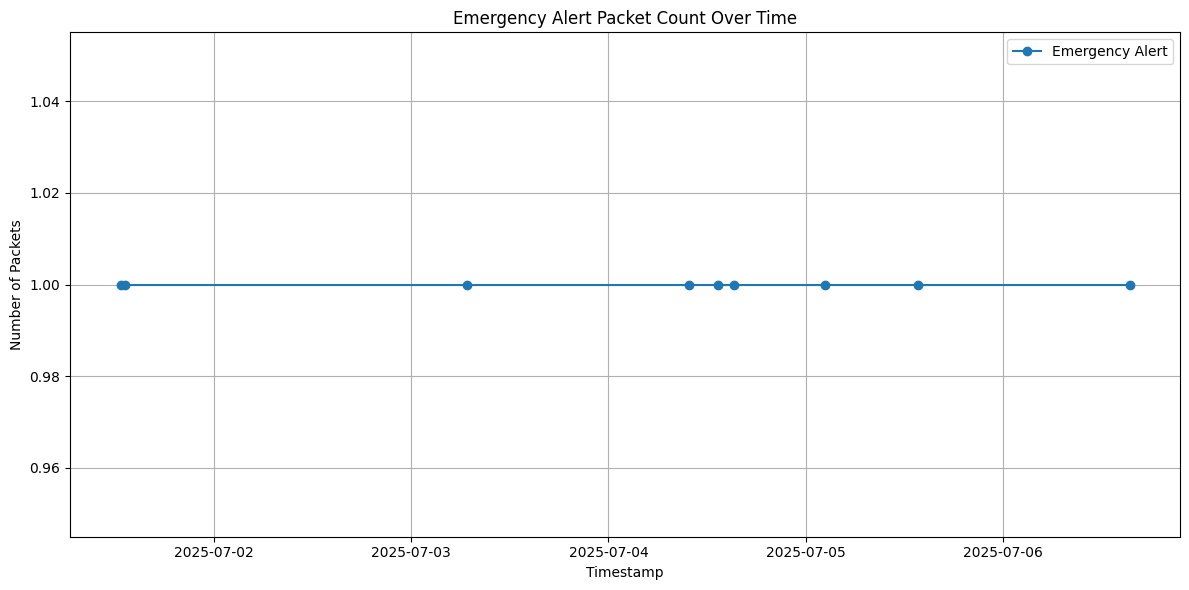

In [10]:
import matplotlib.pyplot as plt

packet_counts_over_time = emergency_alerts_time_series.groupby(['timestamp', 'type']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
for packet_type in packet_counts_over_time['type'].unique():
    type_data = packet_counts_over_time[packet_counts_over_time['type'] == packet_type]
    plt.plot(type_data['timestamp'], type_data['count'], marker='o', linestyle='-', label=packet_type)

plt.xlabel("Timestamp")
plt.ylabel("Number of Packets")
plt.title("Emergency Alert Packet Count Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The time series plot shows the number of packets for each type over time, indicating the frequency of different emergency alert types.
*   The plot visualizes fluctuations and trends in packet counts across different timestamps for each alert type.

### Insights or Next Steps

*   Analyze specific time periods with high packet counts to understand potential events or system behavior driving increased alerts.
*   Investigate the distribution of packet types over time to identify dominant alert types and their temporal patterns.
